# ATMS 391 Geophysical Data Analysis
# Homework 13: Image manipulation and analysis
---

(1) Open the satellite data file, and plot it on a basemap.

In [27]:
%pylab inline
import xray
import scipy.ndimage

#missing/bad data in the dataset are set to 330.0
#these are NOAA Climate Prediction Center merged IR brightness temperatures (4 km resolution)
#the data are Parallax-corrected, meaning that in the shadows of clouds, there is missing data
#also, the Geostationary satellites don't scan the whole disk every hour, so there are missing regions

data=xray.open_dataset('2015-11-29T1130_merg4km.nc')
data
im=data['brightness_temperature'].isel(time=0)

#reduce the resolution of the image to make it use less memory/cpu
im=im[::4,::4]

Populating the interactive namespace from numpy and matplotlib


(2) Filter out the missing pixels near cloud shields due to the geostationary parallax correction.

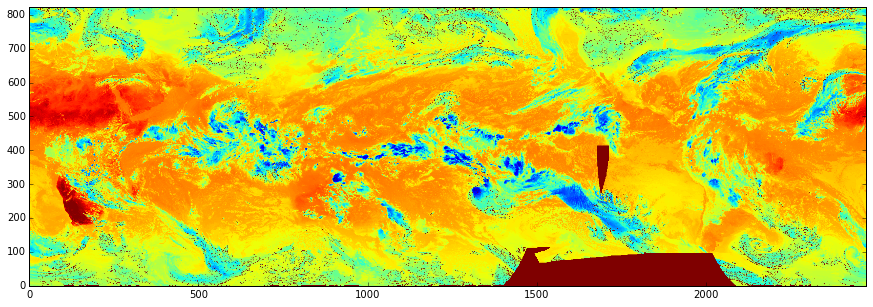

In [28]:
plt.figure(figsize=(15,11))
plt.imshow(im.values,origin='lower')
#plt.colorbar()

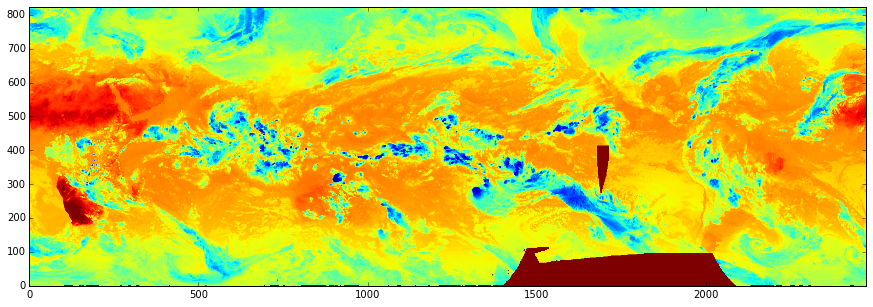

In [32]:
masked=im.values.copy()
masked[masked>325]=0.
im_closed=scipy.ndimage.grey_closing(masked, size=(3,3))
im_closed[im_closed==0]=330.
plt.figure(figsize=(15,11))
plt.imshow(im_closed,origin='lower')

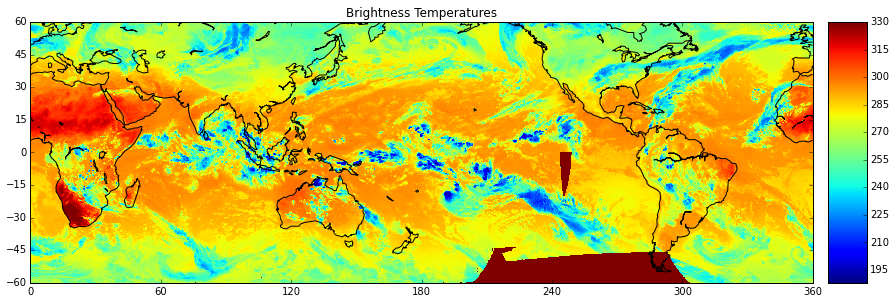

In [33]:
from mpl_toolkits.basemap import Basemap

lon = im['lon'].values
lat = im['lat'].values
plt.figure(figsize=(15,11))
map = Basemap(lon_0 = 180,llcrnrlat=-60, llcrnrlon=0, 
            urcrnrlat=60, urcrnrlon=360)
map.pcolormesh(lon,lat,im_closed)
map.drawcoastlines()
map.colorbar()
plt.yticks(np.arange(-60,75,15))
plt.xticks(np.arange(0,420,60))
plt.title('Brightness Temperatures')
plt.show()

(3) Create a histogram of brightness temperatures in valid regions.  

In [34]:
im_closed

array([[ 260.,  260.,  260., ...,  263.,  263.,  263.],
       [ 260.,  260.,  260., ...,  263.,  263.,  263.],
       [ 264.,  264.,  264., ...,  270.,  269.,  269.],
       ..., 
       [ 262.,  262.,  262., ...,  262.,  262.,  262.],
       [ 280.,  280.,  278., ...,  273.,  269.,  269.],
       [ 280.,  280.,  278., ...,  273.,  271.,  271.]], dtype=float32)

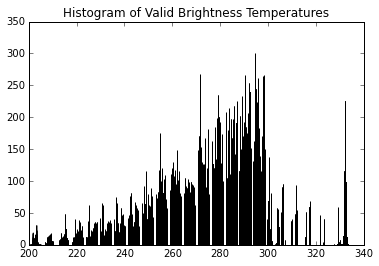

In [35]:
#np.squeeze(im_closed)

plt.hist(np.squeeze(im_closed), bins = np.linspace(200,340,25))
plt.title('Histogram of Valid Brightness Temperatures')
plt.show()

(4) What is the 5th percentile of brightness temperature?  The 1st percentile?

In [36]:
p5,p1 = np.percentile(im_closed,(5, 1))
print('5th percentile: %d' % p5)
print('1st percentile: %d' % p1)



5th percentile: 241
1st percentile: 222


(5) Identify regions of brightness temperature (a) < 210 K (b) < 235 K with a binary mask.  Color them with different colors.

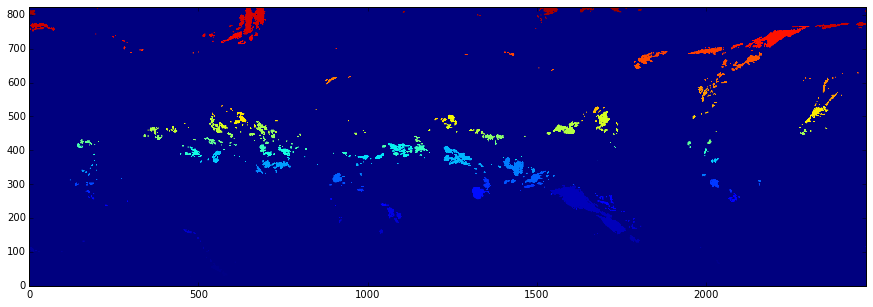

In [37]:
import scipy.ndimage

mask = im_closed < 235

label_im, nb_labels = scipy.ndimage.label(mask)

plt.figure(figsize=(15,11))
plt.imshow(label_im,origin='lower')   

(6) Count how many objects in the image are below 210 K and 235 K.

In [38]:
print(nb_labels) # how many regions?



445


(7) Create a histogram and a CDF of the object sizes at 210 and 235 K.  Plot them on the same graph with a legend.

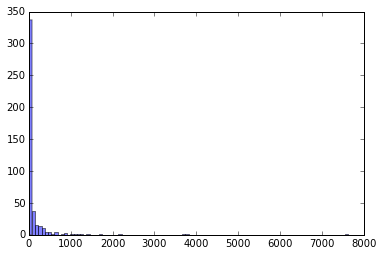

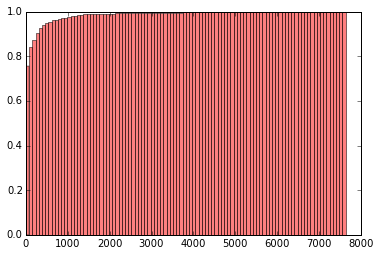

In [39]:
#hint see documentation for ndimage.measurements.sum

#create array of 1s the same size as the brightness temperature array

#use ndimage.measurements.sum to add them in each image

sizes = scipy.ndimage.sum(mask, label_im, range(nb_labels + 1))
mean_vals = scipy.ndimage.sum(im_closed, label_im, range(1, nb_labels + 1))
plt.hist(sizes, bins=100, color='b', alpha=0.5, label='Histogram')
plt.show()

plt.hist(sizes, bins=100, normed=True, color='r', alpha=0.5, cumulative=True, label='CDF')
plt.show()

(8) Create a histogram of the *minimum* values of brightness temperature within each 235 K object.

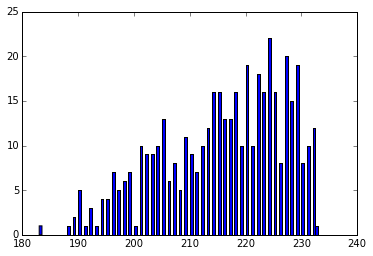

In [40]:
#hint see documentation for ndimage.measurements.extrema
minimums = scipy.ndimage.minimum(im, label_im, range(1, nb_labels + 1))

plt.hist(minimums, bins=100, color='b', label='Histogram')
plt.show()